<a href="https://colab.research.google.com/github/Pjh940114/Study_ML/blob/main/06_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83(K_Nearest_Neighbor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 최근접 이웃(K-Nearest Neighbor)

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 분류와 회귀 모두 지원

![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

In [ ]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

## K 최근접 이웃 분류

* 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [ ]:
iris = load_iris()

In [ ]:
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size =0.2)

In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.975
평가 데이터 점수 : 0.9666666666666667


In [ ]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [ ]:
# scale 후
print("학습 데이터 점수 : {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수 : 0.9758241758241758
평가 데이터 점수 : 0.9649122807017544


In [ ]:
cross_validate(
    estimator = KNeighborsClassifier(),
    X = X, y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.7s finished


{'fit_time': array([0.00130606, 0.00137162, 0.00111294, 0.00102162, 0.00094366]),
 'score_time': array([0.00322247, 0.00396442, 0.00282884, 0.0026679 , 0.00274777]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [ ]:
param_grid = [{'n_neighbors' : [3,5,7],
               'weights' : ['uniform', 'distance'],
               'algorithm' : ['ball_tree', 'kd_tree', 'brute']}]

In [ ]:
gs = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

In [ ]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [ ]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [ ]:
print('GridSearchCV best score : {}'.format(gs.best_score_))

GridSearchCV best score : 0.9800000000000001


In [ ]:
def make_meshgrid(x, y, h = .02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

In [ ]:
tsne = TSNE(n_components = 2)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
iris_comp_df = pd.DataFrame(data = X_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,15.148237,-15.700665,0
1,15.830257,-18.274275,0
2,14.708798,-18.333374,0
3,15.038425,-18.693348,0
4,15.504219,-15.617917,0
...,...,...,...
145,-3.043843,13.730882,2
146,-5.819384,11.688433,2
147,-4.050557,13.133570,2
148,-3.666611,13.973147,2


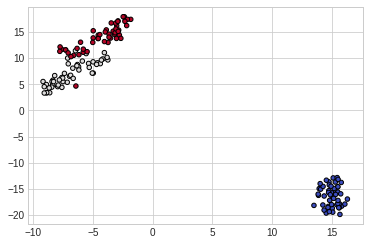

In [ ]:
plt.scatter(X_comp[:,0], X_comp[:,1],
            c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

In [ ]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

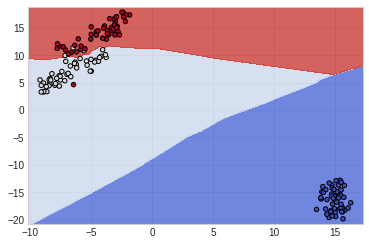

In [ ]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:,1])
plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.8)
plt.scatter(X_comp[:,0], X_comp[:,1], c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

### 유방암 데이터

In [ ]:
cancer = load_breast_cancer()

In [ ]:
cancer_df = pd.DataFrame(data=cancer.data, columns = cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
cancer_train_df = pd.DataFrame(data = X_train, columns = cancer.feature_names)
cancer_train_df['Target'] = y_train # 타겟은 y
cancer_train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,13.110,15.56,87.21,530.2,0.13980,0.17650,0.20710,0.096010,0.1925,0.07692,...,22.40,106.40,827.2,0.18620,0.40990,0.63760,0.19860,0.3147,0.14050,0
1,8.618,11.79,54.34,224.5,0.09752,0.05272,0.02061,0.007799,0.1683,0.07187,...,15.40,59.90,274.9,0.17330,0.12390,0.11680,0.04419,0.3220,0.09026,1
2,11.890,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.021790,0.2019,0.06290,...,27.21,85.09,522.9,0.14260,0.21870,0.11640,0.08263,0.3075,0.07351,1
3,11.850,17.46,75.54,432.7,0.08372,0.05642,0.02688,0.022800,0.1875,0.05715,...,25.75,84.35,517.8,0.13690,0.17580,0.13160,0.09140,0.3101,0.07007,1
4,11.800,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.074150,0.2678,0.07371,...,26.38,91.93,591.7,0.13850,0.40920,0.45040,0.18650,0.5774,0.10300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,9.405,21.70,59.60,271.2,0.10440,0.06159,0.02047,0.012570,0.2025,0.06601,...,31.24,68.73,359.4,0.15260,0.11930,0.06141,0.03770,0.2872,0.08304,1
451,12.270,29.97,77.42,465.4,0.07699,0.03398,0.00000,0.000000,0.1701,0.05960,...,38.05,85.08,558.9,0.09422,0.05213,0.00000,0.00000,0.2409,0.06743,1
452,18.660,17.12,121.40,1077.0,0.10540,0.11000,0.14570,0.086650,0.1966,0.06213,...,24.90,145.40,1549.0,0.15030,0.22910,0.32720,0.16740,0.2894,0.08456,0
453,14.900,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.097110,0.2041,0.06898,...,27.57,125.40,832.7,0.14190,0.70900,0.90190,0.24750,0.2866,0.11550,0


In [ ]:
cancer_test_df = pd.DataFrame(data = X_test, columns = cancer.feature_names)
cancer_test_df['Target'] = y_test # 타겟은 y
cancer_test_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,11.260,19.96,73.72,394.1,0.08020,0.11810,0.09274,0.05588,0.2595,0.06233,...,22.33,78.27,437.6,0.10280,0.18430,0.15460,0.09314,0.2955,0.07009,1
1,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,0.06672,...,27.78,118.60,784.7,0.13160,0.46480,0.45890,0.17270,0.3000,0.08701,0
2,17.300,17.08,113.00,928.2,0.10080,0.10410,0.12660,0.08353,0.1813,0.05613,...,25.09,130.90,1222.0,0.14160,0.24050,0.33780,0.18570,0.3138,0.08113,0
3,12.890,14.11,84.95,512.2,0.08760,0.13460,0.13740,0.03980,0.1596,0.06409,...,17.70,105.00,639.1,0.12540,0.58490,0.77270,0.15610,0.2639,0.11780,1
4,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,0.2378,0.09502,...,16.38,69.05,300.2,0.19020,0.34410,0.20990,0.10250,0.3038,0.12520,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,9.676,13.14,64.12,272.5,0.12550,0.22040,0.11880,0.07038,0.2057,0.09575,...,18.04,69.47,328.1,0.20060,0.36630,0.29130,0.10750,0.2848,0.13640,1
110,11.310,19.04,71.80,394.1,0.08139,0.04701,0.03709,0.02230,0.1516,0.05667,...,23.84,78.00,466.7,0.12900,0.09148,0.14440,0.06961,0.2400,0.06641,1
111,14.220,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,0.06129,...,40.54,102.50,764.0,0.10810,0.24260,0.30640,0.08219,0.1890,0.07796,1
112,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1


In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9538461538461539
평가 데이터 점수 : 0.9298245614035088


In [ ]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [ ]:
print("학습 데이터 점수 : {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수 : 0.9824175824175824
평가 데이터 점수 : 0.9473684210526315


In [ ]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

In [ ]:
cross_validate(
    estimator = estimator,
    X= X, y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.9s finished


{'fit_time': array([0.00304127, 0.00315857, 0.00249362, 0.00269341, 0.00242996]),
 'score_time': array([0.02957225, 0.01219845, 0.01279497, 0.00923085, 0.00800896]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [ ]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
      ('model', KNeighborsClassifier())]
)

In [ ]:
param_grid = [{'model__n_neighbors' : [3, 5, 7],
               'model__weights' : ['uniform', 'distance'],
               'model__algorithm' : ['ball_tree', 'kd_tree', 'brute']}]

In [ ]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

In [ ]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [ ]:
print('GridSearchCV best score : {}'.format(gs.best_score_))

GridSearchCV best score : 0.9701288619779538


In [ ]:
tsne = TSNE(n_components = 2)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
cancer_comp_df = pd.DataFrame(data = X_comp)
cancer_comp_df['Target'] = y
cancer_comp_df

,0,1,Target
0,38.126259,-20.629892,0
1,36.487461,-22.891205,0
2,33.044575,-19.609173,0
3,-26.484642,11.228306,0
4,30.651690,-20.161934,0
...,...,...,...
564,37.367863,-24.404764,0
565,33.229710,-20.746317,0
566,20.262838,-5.999588,0
567,34.871307,-21.361563,0


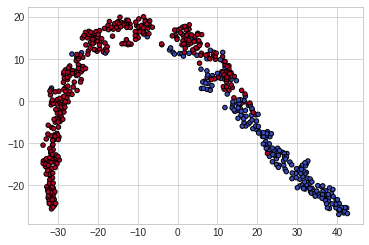

In [ ]:
plt.scatter(X_comp[:,0], X_comp[:,1], c = y, cmap = plt.cm.coolwarm, s = 20, edgecolor = 'k')

In [ ]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

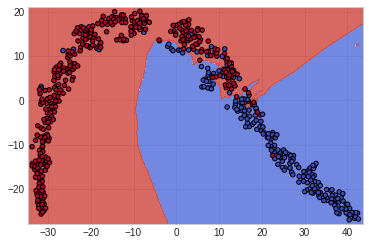

In [ ]:
xx, yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.8);
plt.scatter(X_comp[:,0], X_comp[:,1], c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k');

## k 최근접 이웃 회귀

* k 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
* 이웃 데이터 포인트의 평균이 예측 결과

### 보스턴 주택 가격 데이터

In [ ]:
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
boston_df = pd.DataFrame(data=boston.data, columns = boston.feature_names)
boston_df['Target'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
boston_train_df = pd.DataFrame(data = X_train, columns = boston.feature_names)
boston_train_df['Target'] = y_train # 타겟은 y
boston_train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.04666,80.0,1.52,0.0,0.404,7.107,36.6,7.3090,2.0,329.0,12.6,354.31,8.61,30.3
1,2.24236,0.0,19.58,0.0,0.605,5.854,91.8,2.4220,5.0,403.0,14.7,395.11,11.64,22.7
2,0.05479,33.0,2.18,0.0,0.472,6.616,58.1,3.3700,7.0,222.0,18.4,393.36,8.93,28.4
3,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27,18.9
4,5.82401,0.0,18.10,0.0,0.532,6.242,64.7,3.4242,24.0,666.0,20.2,396.90,10.74,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,24.39380,0.0,18.10,0.0,0.700,4.652,100.0,1.4672,24.0,666.0,20.2,396.90,28.28,10.5
400,0.78420,0.0,8.14,0.0,0.538,5.990,81.7,4.2579,4.0,307.0,21.0,386.75,14.67,17.5
401,0.12744,0.0,6.91,0.0,0.448,6.770,2.9,5.7209,3.0,233.0,17.9,385.41,4.84,26.6
402,28.65580,0.0,18.10,0.0,0.597,5.155,100.0,1.5894,24.0,666.0,20.2,210.97,20.08,16.3


In [ ]:
boston_test_df = pd.DataFrame(data = X_test, columns = boston.feature_names)
boston_test_df['Target'] = y_test # 타겟은 y
boston_test_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.54452,0.0,21.89,0.0,0.624,6.151,97.9,1.6687,4.0,437.0,21.2,396.90,18.46,17.8
1,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26,20.4
2,67.92080,0.0,18.10,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
3,5.69175,0.0,18.10,0.0,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98,19.1
4,88.97620,0.0,18.10,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.57834,20.0,3.97,0.0,0.575,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44,50.0
98,0.22969,0.0,10.59,0.0,0.489,6.326,52.5,4.3549,4.0,277.0,18.6,394.87,10.97,24.4
99,14.05070,0.0,18.10,0.0,0.597,6.657,100.0,1.5275,24.0,666.0,20.2,35.05,21.22,17.2
100,0.13587,0.0,10.59,1.0,0.489,6.064,59.1,4.2392,4.0,277.0,18.6,381.32,14.66,24.4


In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.7237205603617793
평가 데이터 점수 : 0.19237183118000645


In [ ]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [ ]:
# 전처리 후
print("학습 데이터 점수 : {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수 : 0.8638308062651865
평가 데이터 점수 : 0.6097822918871529


In [ ]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

In [ ]:
cross_validate(
    estimator = estimator,
    X= X, y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.7s finished


{'fit_time': array([0.00346923, 0.00329661, 0.00276113, 0.00279188, 0.00339055]),
 'score_time': array([0.00773859, 0.011204  , 0.0027225 , 0.00305462, 0.00274706]),
 'test_score': array([0.56089547, 0.61917359, 0.48661916, 0.46986886, 0.23133037])}

In [ ]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
      ('model', KNeighborsRegressor())]
)

In [ ]:
param_grid = [{'model__n_neighbors' : [3, 5, 7],
               'model__weights' : ['uniform', 'distance'],
               'model__algorithm' : ['ball_tree', 'kd_tree', 'brute']}]

In [ ]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

In [ ]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [ ]:
print('GridSearchCV best score : {}'.format(gs.best_score_))

GridSearchCV best score : 0.4973060611762845


In [ ]:
tsne = TSNE(n_components = 1)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
boston_comp_df = pd.DataFrame(data = X_comp)
boston_comp_df['Target'] = y
boston_comp_df

,0,Target
0,4.746603,24.0
1,-15.763703,21.6
2,-12.067645,34.7
3,-12.994248,33.4
4,-13.254873,36.2
...,...,...
501,1.626151,22.4
502,0.940104,20.6
503,0.142905,23.9
504,0.185347,22.0


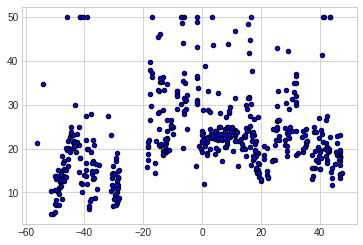

In [ ]:
plt.scatter(X_comp, y, c = 'b', cmap = plt.cm.coolwarm, s = 20, edgecolor = 'k')

In [ ]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

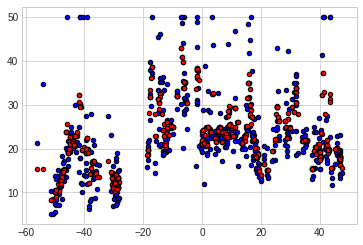

In [ ]:
plt.scatter(X_comp, y, c = 'b', cmap = plt.cm.coolwarm, s = 20, edgecolor = 'k')
plt.scatter(X_comp, predict, c = 'r', cmap = plt.cm.coolwarm, s = 20, edgecolor = 'k')

### 캘리포니아 주택 가격 데이터

In [ ]:
california = fetch_california_housing()

In [ ]:
california_df = pd.DataFrame(data=california.data, columns = california.feature_names)
california_df['Target'] = california.target
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
X, y = california.data, california.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
california_train_df = pd.DataFrame(data = X_train, columns = california.feature_names)
california_train_df['Target'] = y_train # 타겟은 y
california_train_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,7.1366,23.0,5.685393,1.078652,264.0,2.966292,37.15,-122.08,2.739
1,3.2404,27.0,4.035985,1.028409,1065.0,2.017045,34.23,-118.53,2.304
2,4.4091,37.0,5.417160,1.053254,925.0,2.736686,33.93,-118.33,1.484
3,1.6023,35.0,6.323529,1.323529,100.0,2.941176,37.95,-122.37,0.813
4,1.9706,41.0,3.891993,0.986965,2043.0,3.804469,34.09,-118.19,1.442
...,...,...,...,...,...,...,...,...,...
16507,6.0000,40.0,5.990196,1.006536,751.0,2.454248,37.53,-122.30,3.842
16508,1.4923,31.0,4.592841,1.040268,1193.0,2.668904,40.07,-122.14,0.444
16509,6.9664,11.0,7.592705,1.039514,4495.0,3.415653,32.66,-117.01,2.939
16510,2.2328,34.0,3.226974,1.029605,508.0,1.671053,32.75,-117.28,2.667


In [ ]:
california_test_df = pd.DataFrame(data = X_test, columns = california.feature_names)
california_test_df['Target'] = y_test # 타겟은 y
california_test_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,1.5474,44.0,4.674931,1.137741,1396.0,3.845730,32.71,-117.13,0.833
1,2.7348,52.0,4.071279,0.997904,1375.0,2.882600,34.12,-118.26,2.091
2,2.4250,17.0,3.160088,1.162281,769.0,1.686404,33.89,-117.87,1.717
3,5.9158,27.0,5.700997,0.963455,817.0,2.714286,37.34,-122.00,3.431
4,1.9375,52.0,2.927083,1.072917,470.0,4.895833,34.02,-118.28,0.388
...,...,...,...,...,...,...,...,...,...
4123,7.3693,25.0,6.695271,1.022767,1689.0,2.957968,37.33,-122.02,3.736
4124,2.7273,44.0,4.562500,1.027344,509.0,1.988281,32.73,-117.23,2.697
4125,3.2188,36.0,5.477041,1.061224,1011.0,2.579082,33.85,-117.93,1.969
4126,2.6548,27.0,3.443396,1.069182,1300.0,4.088050,33.98,-118.22,1.232


In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
print("학습 데이터 점수 : {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.44990440776578133
평가 데이터 점수 : 0.15526329054531562


In [ ]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [ ]:
# 전처리 후
print("학습 데이터 점수 : {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수 : {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수 : 0.8126643734792667
평가 데이터 점수 : 0.7189961600659138


In [ ]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

In [ ]:
cross_validate(
    estimator = estimator,
    X= X, y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.4s finished


{'fit_time': array([0.03809643, 0.03715324, 0.03301048, 0.03484392, 0.03492403]),
 'score_time': array([0.52783537, 0.42784262, 0.47716808, 0.56680703, 0.34450817]),
 'test_score': array([0.47879396, 0.4760079 , 0.57624554, 0.50259828, 0.57228584])}

In [ ]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
      ('model', KNeighborsRegressor())]
)

In [ ]:
param_grid = [{'model__n_neighbors' : [3, 5, 7],
               'model__weights' : ['uniform', 'distance'],
               'model__algorithm' : ['ball_tree', 'kd_tree', 'brute']}]

In [ ]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

In [ ]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [ ]:
print('GridSearchCV best score : {}'.format(gs.best_score_))

GridSearchCV best score : 0.5376515274379832


In [ ]:
tsne = TSNE(n_components = 1)
X_comp = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
california_comp_df = pd.DataFrame(data = X_comp)
california_comp_df['Target'] = y
california_comp_df

,0,Target
0,-79.779655,4.526
1,-28.692646,3.585
2,-95.856995,3.521
3,-87.210640,3.413
4,-86.572975,3.422
...,...,...
20635,9.402836,0.781
20636,-81.983147,0.771
20637,-26.406252,0.923
20638,59.324970,0.847


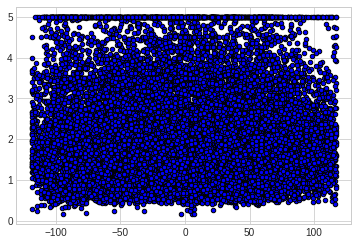

In [ ]:
plt.scatter(X_comp, y, c = 'b', cmap = plt.cm.coolwarm, s = 20, edgecolor = 'k')

In [ ]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

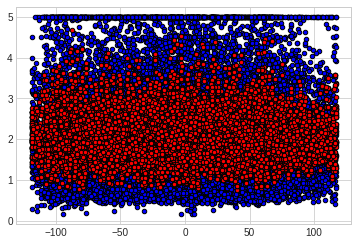

In [ ]:
plt.scatter(X_comp, y, c = 'b', cmap = plt.cm.coolwarm, s = 20, edgecolor = 'k')
plt.scatter(X_comp, predict, c = 'r', cmap = plt.cm.coolwarm, s = 20, edgecolor = 'k')